# Pricnciple Component Analysis
### The note book implements the PCA on synthetic dataset
#### 8 August 2021
#### Ibrahim Radwan

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a synthetic dataset
means = [2.13, -99, 0.11, -1.01] # 4 columns with different means
# Covariance matrix - generalization of the concept of variance to the multivariate case 
cov_matrix = np.array([[1, 0.96, 0, 0], [0.96, 1, 0, 0], [0, 0, 1, 0.87], [0, 0, 0.87, 1]]) 
print('Covariance matrix')
print(cov_matrix)

n = 100 # number of rows
dataset = np.random.multivariate_normal(means, cov_matrix, n)
print("\nDataset:\n", dataset)
print("\nDataset shape:\n", dataset.shape)

Covariance matrix
[[1.   0.96 0.   0.  ]
 [0.96 1.   0.   0.  ]
 [0.   0.   1.   0.87]
 [0.   0.   0.87 1.  ]]

Dataset:
 [[ 2.72656143e+00 -9.80878154e+01 -1.01685294e+00 -1.97553574e+00]
 [ 9.19647171e-01 -9.99850115e+01 -4.81123272e-01 -2.37959882e+00]
 [ 2.68020097e+00 -9.88231923e+01 -4.28914633e-01 -1.12820133e+00]
 [ 2.86139017e+00 -9.83062237e+01  3.76413523e-01 -1.69373085e+00]
 [ 1.85427212e+00 -9.95306637e+01 -8.28046178e-01 -2.33973774e+00]
 [ 1.57376341e+00 -9.98635154e+01 -5.25279681e-02 -1.04457624e+00]
 [ 3.21779723e-01 -1.00728613e+02  1.41412595e+00  4.29278415e-02]
 [ 3.96392382e+00 -9.68702054e+01 -1.49492707e+00 -2.60859463e+00]
 [ 7.20660671e-01 -1.00168744e+02 -6.63979164e-01 -1.64560056e+00]
 [ 8.21616030e-01 -9.99276723e+01 -5.91930618e-03 -1.43049965e+00]
 [ 1.89623437e+00 -9.86014901e+01 -1.63173126e+00 -2.02997324e+00]
 [ 1.56469043e+00 -9.98479347e+01 -4.50366028e-01 -1.02244475e+00]
 [ 3.44974949e+00 -9.77375924e+01 -3.88274006e-01  8.75644243e-02]
 [ 1.59

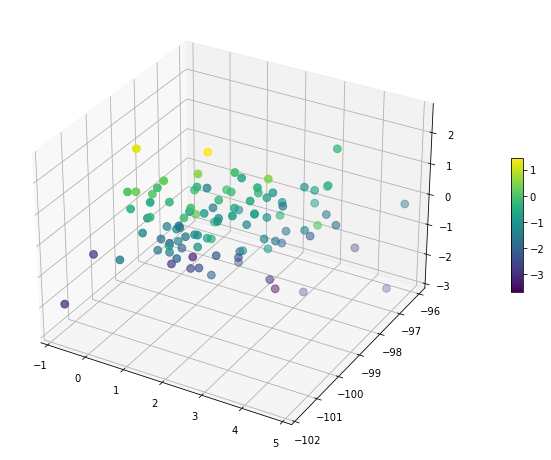

In [4]:
# Let us plot the data
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=dataset[:,0], ys=dataset[:,1], zs=dataset[:,2], c=dataset[:,3], s=60)

cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02,
                    ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)

plt.show()

### 1. Data standardization

In [5]:
print('Before standardization')
print('Mean:\n',dataset.mean(axis=0))
print('Standard deviation:\n',dataset.std(axis=0))

# Standardization
dataset_standardizated = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

print('\nAfter standardization')
print('Mean:\n',dataset_standardizated.mean(axis=0))
print('Standard deviation:\n',dataset_standardizated.std(axis=0))

Before standardization
Mean:
 [ 1.88784851e+00 -9.91895001e+01  5.71532351e-02 -1.09061647e+00]
Standard deviation:
 [1.04507152 1.05788573 1.02983885 0.97470713]

After standardization
Mean:
 [ 5.77315973e-17 -1.54321000e-14  4.44089210e-18  4.52970994e-16]
Standard deviation:
 [1. 1. 1. 1.]


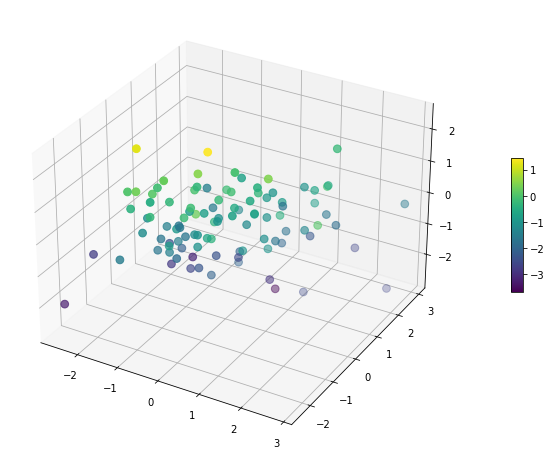

In [6]:
# Let us plot the standardised data
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=dataset_standardizated[:,0], ys=dataset_standardizated[:,1], zs=dataset_standardizated[:,2], c=dataset[:,3], s=60)

cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02,
                    ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)

plt.show()

### 2. Creating a covariance matrix.

In [7]:
covariance_matrix = np.cov(dataset_standardizated.T)
covariance_matrix

array([[ 1.01010101,  0.97729397, -0.18162454, -0.09977748],
       [ 0.97729397,  1.01010101, -0.18055573, -0.09149771],
       [-0.18162454, -0.18055573,  1.01010101,  0.85825336],
       [-0.09977748, -0.09149771,  0.85825336,  1.01010101]])

### 3. Eigen Decomposition.

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('eigenvalues:\n',eigenvalues,'\n\neigenvectors:\n',eigenvectors)

eigenvalues:
 [2.21308371 1.64674588 0.03268414 0.14789031] 

eigenvectors:
 [[-0.55203643 -0.44008121  0.70604732 -0.05551127]
 [-0.55021497 -0.44338896 -0.70748309 -0.01172169]
 [ 0.4652689  -0.52631531 -0.02020763 -0.71141317]
 [ 0.41957612 -0.5768249   0.02359056  0.70048012]]


### 4. Explained total variance.

In [9]:
explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)

[0.548, 0.408, 0.037, 0.008]


### 5. Feature transformation.

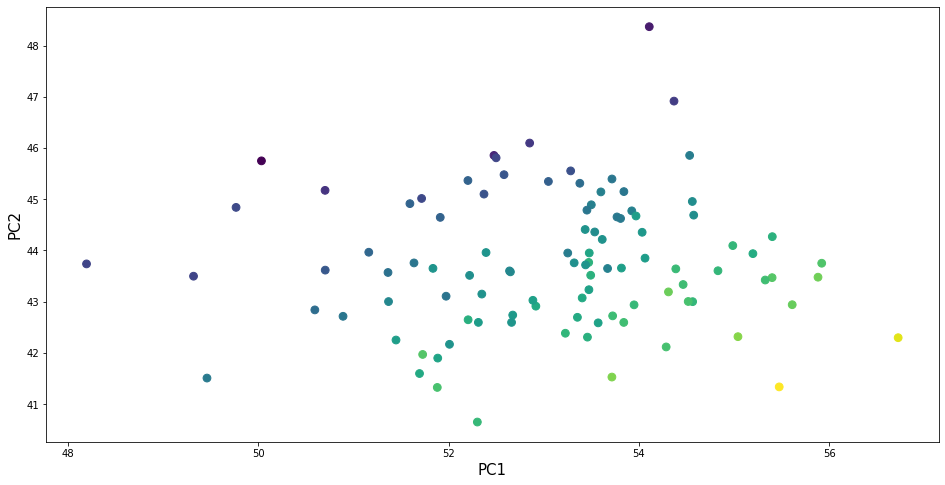

In [14]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key = lambda k: k[0], reverse=True)

w = np.hstack((eigenpairs[0][1][:, np.newaxis],
               eigenpairs[1][1][:, np.newaxis]))
pc1 = dataset.dot(w.T[0])
pc2 = dataset.dot(w.T[1])

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(x=pc1, y=pc2, c=dataset[:,3], s=60)
ax.set_xlabel(xlabel='PC1', rotation=0, loc='center', size=15)
ax.set_ylabel(ylabel='PC2', rotation=90, loc='center', size=15)
plt.show()